# A FOSS (Free and Open-source) Solution To Working With Data and Creating Data Visualizations

<table>
        <tr>
            <td style='vertical-align: top; padding-top: 0px;'><img src='CHPL_Brandmark_full color.png' width='500px'></td>
            <td>
<pre style='font-size: 1.5em;'>
Ray Voelker
ILS Developer / System Administrator

E-mail      : ray.voelker@cincinnatilibrary.org
E-mail      : ray.voelker@gmail.com

Cincinnati &amp; Hamilton County Public Library
800 Vine Street Cincinnati, Ohio 45202

For Minds of All Kinds
https://cincinnatilibrary.org
</pre>
            </td>
        </tr>
</table>

## Technology / Software Used Here

* **Linux PC / Server / VM** on which to run the software<br><img src='tux.png' width='100px'>

* **Python** <br><img src='python.png' width='200px'>
    * Python Software Libraries / Modules:
        * **pandas** - https://pandas.pydata.org/<br><img src='pandas.png' width='200px'>
        >pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
        built on top of the Python programming language. 
        
        * **SQLAlchemy** - https://www.sqlalchemy.org/ <br><img src='sqla_logo.png' width='200px'>
        
        >SQLAlchemy is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.
        
        * **Altair** - https://altair-viz.github.io/ <br><img src='altair-logo-light.png' width='150px'>
        
        >Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite, and the source is available on GitHub.
        
        * **Jupyter Lab / Notebook** - https://jupyter.org/ <br><img src='jupyter_logo.png' width='100px'>
        
        >The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

## Other Software Not Used Here But Still Useful For Working With Data

* SQLite - https://www.sqlite.org/

>SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine.

* DB Browser for SQLite - https://sqlitebrowser.org/

>DB Browser for SQLite (DB4S) is a high quality, visual, open source tool to create, design, and edit database files compatible with SQLite.

* plotly - https://plotly.com/python/getting-started/

>Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST. 

* Numpy - https://numpy.org/

>The fundamental package for scientific computing with Python

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import altair as alt

# vars is a python file that sets pg_username and pg_password
import vars

### Connect to Database (**SQLAlchemy**)

Below is an example of how to connect to the sierra database using **SQLAlchemy**

In [2]:
# create our connection string for connecting to our Sierra database
connection_uri = 'postgres://{}:{}@sierra-db.plch.net:1032/iii'.format(vars.pg_username, vars.pg_password)

# use sqlalchemy to create our database connection
'''
The Engine is not synonymous to the DBAPI connect function, which represents 
just one connection resource - the Engine is most efficient when created just 
once at the module level of an application, not per-object or per-function call.

https://docs.sqlalchemy.org/en/13/core/connections.html
'''
con = create_engine(connection_uri)

### Query the Sierra Database and Store Results in Pandas Dataframe

In [3]:
# simple example query to query 10 bib record numbers

sql = """
    SELECT
    r.id, r.record_type_code, r.record_num
    
    FROM
    sierra_view.record_metadata as r
    
    WHERE
    r.record_type_code = %s
    AND r.campus_code = ''
    
    LIMIT %s
"""

df = pd.read_sql(sql=sql, con=con, params=['b', 10])

# display the dataframe
print(df)

             id record_type_code  record_num
0  420909750939                b     2955931
1  420909750940                b     2955932
2  420908008914                b     1213906
3  420908439767                b     1644759
4  420908071572                b     1276564
5  420908076512                b     1281504
6  420909750941                b     2955933
7  420909152111                b     2357103
8  420907991692                b     1196684
9  420908440277                b     1645269


### Query Database (Aggregate)

Suppose now that we wanted to visualize how many bib records are created in our system **per month**...

In [4]:
sql = """
SELECT
substring(date(r.creation_date_gmt)::TEXT from 1 for 7) as month_created,
count(*) as count

FROM
sierra_view.record_metadata as r

WHERE
r.record_type_code = 'b'

GROUP BY
month_created

ORDER BY
month_created
"""

df = pd.read_sql(sql=sql, con=con)
print(df)

    month_created    count
0         2012-06  1789664
1         2012-07     3546
2         2012-08     5699
3         2012-09    11146
4         2012-10     3895
..            ...      ...
96        2020-06     6827
97        2020-07     6235
98        2020-08     8153
99        2020-09     6860
100          None        2

[101 rows x 2 columns]


In [5]:
'''
Here are some basic things you can do with a dataframe
'''

# df.info()                               # Print a concise summary of a DataFrame.
# df.shape                                # Return a tuple representing the dimensionality of the DataFrame.
# df.head()                               # Returns the first `n` rows for the object
# df.tail()                               # Return the last `n` rows
# df.columns                              # The column labels of the DataFrame.
# df.keys()                               # This is index for Series, columns for DataFrame.
# df.describe()                           # Generate descriptive statistics.
# df['count'].describe()                  # Generate descriptive statistics.
# df[df['month_created'] == '2020-09']    # Filter

                                    
# df[df['month_created'] >= '2020-01'].describe()    # Filter and Describe

'\nHere are some basic things you can do with a dataframe\n'

### Plot Data (**Altair**)

Next, we create a simple plot of our data

In [6]:
source = df

alt.Chart(source).mark_bar().encode(
    x='month_created:O',
    y='count'
)

alt.Chart(...)

Well, that's not very useful! ...

### Plot Filtered Data (**Pandas** DataFrame Filter)

It's fairly easy to filter a DataFrame by values in a column:

In [7]:
source = df[ df['month_created'] >= '2019' ]

alt.Chart(source).mark_bar().encode(
    x='month_created:O',
    y='count'
).properties(
    title='Bib Records Created Per Month (Year >= 2019)',
    width=900
)

alt.Chart(...)

In [8]:
# change it to a line chart!

alt.Chart(source).mark_line().encode(
    x='month_created:T',
    y='count',
    tooltip=['month_created:T', 'count']
).properties(
    title='Bib Records Created Per Month (Year >= 2019)',
    width=900
)

alt.Chart(...)

In [9]:
# also bring in patron records and item records to aggregate on
sql = """
SELECT
substring(date(r.creation_date_gmt)::TEXT from 1 for 7) as month_created,
CASE r.record_type_code
    WHEN 'b' THEN 'bib record'
    WHEN 'p' THEN 'patron record'
    -- lets bring this in too, but remember to filter it out in the next plot!
    WHEN 'i' THEN 'item record'
END AS record_type,
count(*) as count

FROM
sierra_view.record_metadata as r

WHERE
r.record_type_code IN ('b', 'p', 'i')

GROUP BY
month_created,
r.record_type_code

ORDER BY
month_created
"""

df = pd.read_sql(sql=sql, con=con)
df.head()

,month_created,record_type,count
0,2012-06,bib record,1789664
1,2012-06,item record,3708303
2,2012-06,patron record,5
3,2012-07,bib record,3546
4,2012-07,item record,2037229


In [10]:
'''
Plot bib and patron record ... rembering to filter out the item records!
'''

source = df[(df['month_created'] >= '2019') 
            & (df['record_type'].isin(['bib record', 'patron record'])) ]

bib_v_patron = alt.Chart(source).mark_line().encode(
    x='month_created:T',
    y='count',
    color='record_type',
    tooltip=['month_created:T', 'count', 'record_type']
).properties(
    title='Bib Records and Patron Records Created Per Month (Year >= 2019)',
    width=900
)

# display the chart
bib_v_patron

alt.Chart(...)

In [11]:
source = df[
    (df['month_created'] >= '2019') 
            & (df['record_type'].isin(['bib record', 'item record'])) ]

bib_v_item = alt.Chart(source).mark_line().encode(
    x='month_created:T',
    y='count',
    color='record_type',
    tooltip=['month_created:T', 'count', 'record_type']
).properties(
    title='Bib Records and Item Records Created Per Month (Year >= 2019)',
    width=900
)

# display the chart
bib_v_item

alt.Chart(...)

In [12]:
'''
concatinate the two charts together!

NOTE: The scales don't match ... we'd need to get a little fancier to make sure the scales match
'''

alt.vconcat(bib_v_patron, bib_v_item)

alt.VConcatChart(...)

In [13]:
# get "fancy" and set the scale on the first one to match the second
max_scale = df[(df['month_created'] >= '2019') 
   & (df['record_type'].isin(['bib record', 'item record']))
  ]['count'].max()

print('max_scale: {}'.format(max_scale))

max_scale: 61856


In [14]:
'''
Plot bib and patron record ... AGAIN! (with the scale to match bib and items)
'''

source = df[(df['month_created'] >= '2019') 
            & (df['record_type'].isin(['bib record', 'patron record'])) ]

bib_v_patron = alt.Chart(source).mark_line().encode(
    x='month_created:T',
    y=alt.Y('count',
            scale=alt.Scale(domain=(0, max_scale)),
           ),
    color='record_type',
    tooltip=['month_created:T', 'count', 'record_type']
).properties(
    title='Bib Records and Patron Records Created Per Month (Year >= 2019)',
    width=900
)

# display the charts ... but now with the same SCALE!!
alt.vconcat(bib_v_patron, bib_v_item)

alt.VConcatChart(...)

---
### TRANSACTION DATA!!!

In [15]:
'''
For a specific date, examine the relationship between transactions of types
"checkout" and "filled hold" 

NOTE: "filled hold" transactions are a portion of the "checkout"
'''

# group by operations ('checkout' and 'filled hold') and location
# count the number of transaction in each grouping 

search_date = '2020-09-21'

sql = """
SELECT
-- c.id,
-- c.transaction_gmt,
-- c.op_code,
CASE c.op_code
    WHEN 'o' THEN 'checkouts total'
    WHEN 'f' THEN 'filled holds'
END as op_name,
-- c.patron_record_id,
-- c.item_record_id,
-- c.ptype_code,
(
	select
	m.location_code
	from
	sierra_view.statistic_group_myuser as m
	where
	m.code = c.stat_group_code_num
) as transaction_location_code,
date(c.transaction_gmt) as transaction_date,
count(*) as count

FROM
sierra_view.circ_trans as c

WHERE
-- transaction operations: 'checkout' and 'filled hold' 
c.op_code IN ('o', 'f')
AND date(c.transaction_gmt) = date(%s)
AND ptype_code != '196' -- exclude our admin card type

GROUP BY
op_name,
transaction_location_code,
transaction_date
"""

df = pd.read_sql(sql=sql, con=con, params=[search_date])
print(df)

            op_name transaction_location_code transaction_date  count
0   checkouts total                         1       2020-09-21    751
1   checkouts total                        an       2020-09-21    806
2   checkouts total                        av       2020-09-21     47
3   checkouts total                        ba       2020-09-21    764
4   checkouts total                        bh       2020-09-21     62
..              ...                       ...              ...    ...
79     filled holds                        sm       2020-09-21    359
80     filled holds                        wh       2020-09-21     65
81     filled holds                        wt       2020-09-21     32
82     filled holds                        ww       2020-09-21     67
83     filled holds                        wy       2020-09-21    112

[84 rows x 4 columns]


In [16]:
# first set the transaction date to a datetime that pandas / altair can use in the chart display (hover-over)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# filter the dataframe
# source = df[df['op_name'] == 'checkouts total']
source = df

alt.Chart(source).mark_bar().encode(
    
    x=alt.X('transaction_location_code'),
    y=alt.Y('count', ),
    color='op_name',
    tooltip=['transaction_date', 'transaction_location_code', 'op_name', 'count']
).properties(
    title='Total Checkouts Per Location - {}'.format(search_date)
).configure_title(
    # fontSize=20,
    anchor='start',
)

alt.Chart(...)

In [17]:
# sort on the count, or y axis
# source = df[df['op_name'] == 'checkouts total' ]
source = df

alt.Chart(source).mark_bar().encode(
    
    x=alt.X('transaction_location_code', sort='-y'),
    y=alt.Y('count', ),
    tooltip=['transaction_date', 'transaction_location_code', 'op_name', 'count'],
    color='op_name',
).properties(
    title='Total Checkouts Per Location - {}'.format(search_date)
).configure_title(
    # fontSize=20,
    anchor='start',
)

alt.Chart(...)

In [18]:
# or maybe you'd like to see it vertically?
# sort on the count, or y axis
# flip the axis ...

# source = df[df['op_name'] == 'checkouts total' ]
source = df

alt.Chart(source).mark_bar().encode(
    
    x=alt.X('count', ),
    y=alt.Y('transaction_location_code', sort='-x'),
    tooltip=['transaction_date', 'transaction_location_code', 'op_name', 'count'],
    color='op_name'
).properties(
    title='Total Checkouts Per Location - {}'.format(search_date)
).configure_title(
    # fontSize=20,
    anchor='start',
)

alt.Chart(...)

In [19]:
# suppose you want to compare multiple days in a row (maybe the last 3 days)

# we can make our plot into a function, and loop our query!

sql = """
with transactions as (

	SELECT
	CASE c.op_code
	    WHEN 'o' THEN 'checkouts total'
	    WHEN 'f' THEN 'filled holds'
	END as op_name,
	(
		select
		m.location_code
		from
		sierra_view.statistic_group_myuser as m
		where
		m.code = c.stat_group_code_num
	) as transaction_location_code,
	date(c.transaction_gmt) as transaction_date,
	count(*) as count

	FROM
	sierra_view.circ_trans as c

	WHERE
	-- transaction operations: 'checkout' and 'filled hold' 
	c.op_code IN ('o', 'f')
	-- transactions with a timestamp from X day ago...
	AND date(c.transaction_gmt) = date(NOW() - '%s day'::interval)
	AND ptype_code != '196'

	GROUP BY
	op_name,
	transaction_location_code,
	transaction_date
)

-- we want every location that we choose to be represented, even if there is no data
SELECT DISTINCT
m.location_code,
t.transaction_date,
coalesce(t.op_name, 'checkouts total') as op_name,
coalesce(t.count, 0) as count

FROM
sierra_view.statistic_group_myuser as m

LEFT OUTER JOIN
transactions as t
ON
  t.transaction_location_code = m.location_code
  
  
order by
m.location_code,
op_name,
count

"""


def create_chart(df, days_ago):
#     source = df[df['op_name'] == 'checkouts total']
    source = df

    chart = alt.Chart(source).mark_bar().encode(
        x=alt.X('count', ),
        y=alt.Y('location_code', sort='-x'),
        tooltip=['location_code', 'op_name', 'count'],
        color='op_name'
    ).properties(
        title='{} Days Ago - Total Checkouts Per Location'.format(days_ago),
        width=300
    )
    
    return chart

# create an empty list for our charts 
charts = []

for i in range(1, 4):
    print(i)
    df = pd.read_sql(sql=sql, con=con, params=[i])
    # set the transaction date to a datetime that pandas can use
    # df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    del df['transaction_date']
    chart = create_chart(df, i)
    charts.append(chart)
    
print('done!')

alt.hconcat(charts[0],
            charts[1],
            charts[2],
           ).configure_title(
        # fontSize=20,
        anchor='start',
    )
# charts[0]

1
2
3
done!


alt.HConcatChart(...)

### Saving and Sharing Altair Charts

* One way is to use the .save() method and export directly to a PNG, or other file type...

In [20]:
# save the visulization in a png in the local directory...

alt.hconcat(charts[0],
            charts[1],
            charts[2],
           ).configure_title(
        # fontSize=20,
        anchor='start',
    ).save('test_output.png')

* Another way is to click on the "three dots" menu and either save it or share it ...

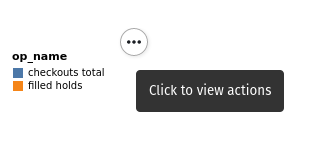

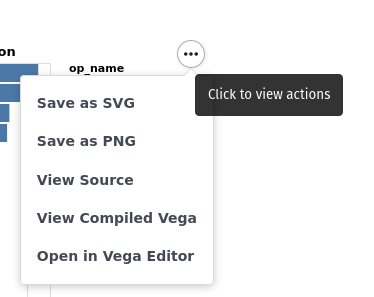


* Opening in the Vega Editor, and then clicking "Share" is a nice way to share interactive versions of the chart 

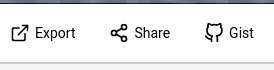

WARNING: the urls can get HUGE! (since sharing the chart encodes all the data into the URL query itself):

[click to view my visualization!](https://vega.github.io/editor/#/url/vega-lite/N4Igxg9gdgZglgcxALlANzgUwO4tJKAFzigFcJSBnAdTgBNCALFAFgAY2AacaYsiygAlMiRoRQBmDgF9uxQgBtMeEAEMoYRhABOKEJUKrt46bJB1VhlVFUBbZcnOXVAWgAcdGG0ye3MAIx0AGwATG4ARgCc-iFsLP7esRIwqhIhIf4gZrZGANZ64UYg3JgaEHQkSKg8CjoqhACeAA4OIFAQtiSqCsUg8JgKdHoQTQD6NvZZchAQCsRNKADaoI0teoSYtk063b39g+va6pSqYMTQoxYbUyvNre2dNj3c+0OOhEdQJ2dwF7Vgll+UFGkDoylktzWjgeXWefSwB0cI3GdnBnEhrQAjqR1PJAWhlC8EW8eKQiFkALrcAAe9TuehhTz2xMOx1O52B-0BF1BhP0OnEjhcDSmIBF1VWWJxRDghmIBOZAxJkDJJjM8iUegAKhBDAoAAQAYUYmDAuQohEo+oACphtPqADIQAEc-UufWxWIuNiRFwZXoAEkomk2qj0YkITUoyAA9DGCQhVAA6BCyxikcJJ34x4MmnLxzCJlwKWWYeMsJNuJP+JMAK0o0F6V1UlEwlpUzfcnm8vgCwTCURicQSmCSKTS-uQyxAyImrRDZotVsIut2ck+3w5oy5W95eky67ZPwuV1anrY3t9GS1HGQt44vRV5OQAHYAKz+CEzsZzvQL82kJa+ornqvQfEeW47kCILlK06hgRu7LQaeejnpefr+DebB3thD7cE+gpuGwQRfrOqJ-iai6Acuq5wuBXxIX8zrcsCe6OKoaAIRByGWGebBej6GFYThOGPhQz4sC+pE-uRjj-kuwG0VxDHHpyzG7rBBRhoeKlbihjhoYJ173rhbBiaqKAvkELDSSikxyZRAFASBa4gPRm7QVBPKaY44TMDpHknrxqH8ReRmYSZon4eJgqhLZv4OaaTk0aBAWMWpLrQWx4D+W5iGqZcwUGaF6HGaZUWks+bhuPFsk5UlCkuXR+WQepWU+eAzXcUF1zFQJV4ReVeGVYKISRGwtX2fVVHOUpaUFV5rEdZAymBcC+kgIZA3CSZ5nPpENnot+dnzo5jVzXl3UZSxMFgn+ujzXpRWbSV4U7aZe2Cv4n5HWRU3ydRimpZdumeW13l3XJnGPTxvUvf1QmRcNBGSBIb6TadDWA01q3pdu4NLZD5gLDDPV8QjZUicjMUoCELAhBjFFY7NwPuXji23a0DC4wVG1bYjQ1mdFFnIG+dOM4lM0pa5bMLQTnN6JgJMg2thVw-zlO7cLz4vgzv0yf9Z3YxdsutZlEOtDAEA8096uvdtSNCyNKD+AdEvTclQMyy1YPm4TrQIHypuw+TYUO4Ln2WUEE36ydTNS17XWg0xfsK44CC5cHZMhRTg1U07KOvj9oB-ZjCc46T10aUTCAPSreN8-bAv55HyBBEEkTuwDLPe1d+Op9ljDafXvPPRreda87yAsEE6OxwlHvnazPspzdg-K1n61j03msfdrgrsCR891d30tJ6rHPZQo0Mj7boelRPe9T-TMclwbZeexXt++2vHU5DbIcc5h2bpPQuLBIgSC7kbHu592by2yrYIYlc1b3zeo7Vu6QoHMzPgA1e1dWi2FsLgredtc7vQqoXEIussHlxNivKu7Uia2CgMQlBQCH7kOpiLb6es35x0lp-OhfdL5-2tsgxuZD0H71YOLY+htsGJ1YSIph4hxHb0kRHaRyAqE0MEcvYR8C-64DUaQ4Bu8KE02QK7TuciP5L17snBhFsGR103mwvqZjH4WJFmkI+fCF6n0Ucg5R9xKCsIkZ4zhBdLExCkrY+OeiHEX0MUTKAxjv7Zw8RwqRU90h+OOgE6BODgkpNaBAYebiInZM0bkl8cT-EnyKUEjJTj-bDCSQ3dRkScmF3yaXBJ9jYFywHh1CAYSTGoPDi3LRb5Zm6MGUo0pegmhDLvuwtBNTKFvj6e-AZxt9GOP7r-Im2gg70PcfDbpmzLEhA-PM-ZHThnHNaJQcI4SunVOmVPSI9SCmNIUV-NxIS9CUEzucqpGyvlgOsvcmBiyRlE0oEQiZ6ypmgMsW4casLiktKOfgvQ2AwV9whWip+hd-Bo2xc0oFSzHDYFUbiklICyUxNuVSwF5zgV0vSZUj5kL0XcLcJA+JAiFklIRa0bAIoUVZP5SykWdNfn9McPABQSg6D6i0IMcZuKuUgAPIyvlpLvHPgkEEYVDSpqqvVZq2YdAdU0olXoeCMrLmfIFRJfwh1LWWzgGqnwtrtXwuec6m+vLTHuvlc+HZ-D4T+o1Vq+1wb8W+QqeCo1zKTWCjNa-P5Vq-U2sTQ6zltKQB+XeRGuVWaXZKt2SqgtAai3JsYadCtkzM1cNNRavNvr42BqTeKkNclVmANlcaztX0IHu2tY2u1xaDFOrkmIw1lbx3RJ8d25VcbC1zubc4uSrj02ro7euqq06G0Jt3YOlN4Aw1HvbeYidLs3w1RFdu2dQbr0tr0HQDe97UUntbgkXhPa9AzsvZ+3VpbuauvHlEoDbha2xvA-2+dhy9VKzbQBx9p6vretA-WvtTav37r6Mu8ND6vFPrbq+n1YGL2ob3W09OZziUZpwxg8156iNXqg4ukAGcsNjsAzMzddb30QYHXxodAnD1sePRxrREgZ7cZ3ZBx1Mmh5CbdVW6j-hqqqY-VJjTN7GB-vk5R+DWjYhzzo4RtTxmS38evtpuDPTLFSHw1ulDxHpM3v-rBneVHcM1pA95hjvmTPfscIg1zQWrNT38EhhePneNRdI4QuLGioWWOiIZyTaHkn8eYVlq5OWRYsDE8hiLaWnMydsOR-9wnFOJbim+1L6m6v+YZRR7DwWMFVZSzVzrC76s8qazptdQG2C2YIxJxjJHmNtDk4cplLXyVsGS3VDrjnRs3q+KVyN1bXy5vCzxkb6HS1pMO7pkLVifT5YW356LM400Wb6wl8lZrHuRa6y98pI7MmTZE1PGNQ3zu7cu-xsZN2ptaMiLNs7DnCtwP4ys2HIPyX+ER+JnbKOnk3tORj9bMSWBedx8NyHRWZOvOJ-1rR0cfu1b2y90FdPPs3JYDj6rEP8dmxp8ildln3M+LfDYuz83fss9I4S9nIvo3c-B8jpjacQD0rl9cnxYWKe85V9lbA433vNfp6Drb+bdeLdV1KjX5Xnw8OkBSUwQA/view)
